# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker
import warnings

In [3]:
warnings.filterwarnings('ignore')

Configurando a aparência dos gráficos:

In [5]:
sns.set_style('whitegrid', {'grid.color': '.6', 'grid.linestyle': ':'})

Definindo função para tratar o DataFrame:

In [7]:
def filter (df):
    
    ''' Função para filtrar as informações do DataFrame '''
    
    df = df.drop(['Unnamed: 0', 'index'], axis = 1)
    df['data_ref'] = pd.to_datetime(df['data_ref'])
    df_new = df.dropna().reset_index(drop=True)
    return df_new

Leitura do DataFrame:

In [9]:
previsao_renda = pd.read_csv('previsao_de_renda.csv')
previsao_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


Verificando os metadados do DataFrame carregado:

In [11]:
metadados = pd.DataFrame({'dtypes': previsao_renda.dtypes})
metadados['missing'] = previsao_renda.isna().sum()
metadados['valores_unicos'] = previsao_renda.nunique()

metadados

,dtypes,missing,valores_unicos
Unnamed: 0,int64,0,15000
data_ref,object,0,15
index,int64,0,9837
sexo,object,0,2
posse_de_veiculo,bool,0,2
posse_de_imovel,bool,0,2
qtd_filhos,int64,0,8
tipo_renda,object,0,5
educacao,object,0,5
estado_civil,object,0,5


Tratamento do DataFrame:

In [13]:
previsao_renda_filter = filter(previsao_renda)
previsao_renda_filter.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


Verificando os metadados depois do tratamento:

In [15]:
metadados = pd.DataFrame({'dtypes': previsao_renda_filter.dtypes})
metadados['missing'] = previsao_renda_filter.isna().sum()
metadados['valores_unicos'] = previsao_renda_filter.nunique()

metadados

,dtypes,missing,valores_unicos
data_ref,datetime64[ns],0,15
sexo,object,0,2
posse_de_veiculo,bool,0,2
posse_de_imovel,bool,0,2
qtd_filhos,int64,0,8
tipo_renda,object,0,5
educacao,object,0,5
estado_civil,object,0,5
tipo_residencia,object,0,6
idade,int64,0,46


1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

Filtrando apenas aquelas colunas que são variáveis qualitativas, incluindo a variável de tempo:

In [17]:
var_qualitativo = previsao_renda_filter.select_dtypes(exclude=['int64','float64']).columns
previsao_renda_filter[var_qualitativo].head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa,False
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa,False
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa,False
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa,False
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa,False


Função para avaliar a distribuição das variáveis qualitativas ao longo do tempo:

In [19]:
def bar(var):
    
    ''' Recebe a string de uma variável categórica e retorna
        um barplot da distribuição da variável no tempo '''
    
    previsao_renda_to_plot = previsao_renda_filter.copy()
    
    if pd.api.types.is_bool_dtype(previsao_renda_to_plot[var]):
        previsao_renda_to_plot[var] = previsao_renda_to_plot[var].astype('str')
    
    fig = plt.figure(figsize = (10,8))
    ax = sns.countplot(x = 'data_ref',
                       hue = var,
                       data = previsao_renda_to_plot[var_qualitativo]
                       )

    tick_data = previsao_renda_to_plot['data_ref'].map(lambda data: data.strftime('%m/%Y')).unique()

    tick_data.tolist()

    ticks = ax.set_xticks(list(range(previsao_renda_to_plot['data_ref'].nunique())))
    labels = ax.set_xticklabels(tick_data, rotation=45)
    title = ax.set_title(f'Gráfico distribuição ao longo do tempo da variável explicativa {var}')

    plt.xlabel('Tempo')
    plt.ylabel('Contagem')
    plt.legend(title = var.capitalize(),
                bbox_to_anchor = (1.05, 1),
                loc = 2,
                borderaxespad = 0
                )

Função para avaliar a distribuição das variáveis qualitativas ao longo do tempo em porcentagem:

In [21]:
def stacked(var):

    ''' Recebe a string de uma variável categórica e retorna
        um barplot com a porcentagem da distribuição da variável no tempo '''
    
    previsao_renda_to_plot = previsao_renda_filter.copy()
    
    if pd.api.types.is_bool_dtype(previsao_renda_to_plot[var]):
        previsao_renda_to_plot[var] = previsao_renda_to_plot[var].astype('str')
    
    tab_freq = pd.crosstab(previsao_renda_to_plot['data_ref'],previsao_renda_to_plot[var])
    tab = tab_freq.div(tab_freq.sum(axis = 1), axis = 0)

    ax = tab.plot.bar(stacked = True, figsize = (10,8))
    
    tick_data = previsao_renda_to_plot['data_ref'].map(lambda data: data.strftime('%m/%Y')).unique()

    tick_data.tolist()

    ticks = ax.set_xticks(list(range(previsao_renda_to_plot['data_ref'].nunique())))
    labels = ax.set_xticklabels(tick_data, rotation=45)
    title = ax.set_title(f'Gráfico distribuição ao longo do tempo da variável explicativa {var}')

    ylabels = ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
    
    plt.xlabel('Tempo')
    plt.ylabel('Porcentagem')
    plt.legend(title = var.capitalize(),
                bbox_to_anchor = (1.05, 1),
                loc = 2,
                borderaxespad = 0
                )

##### Gráfico Sexo:

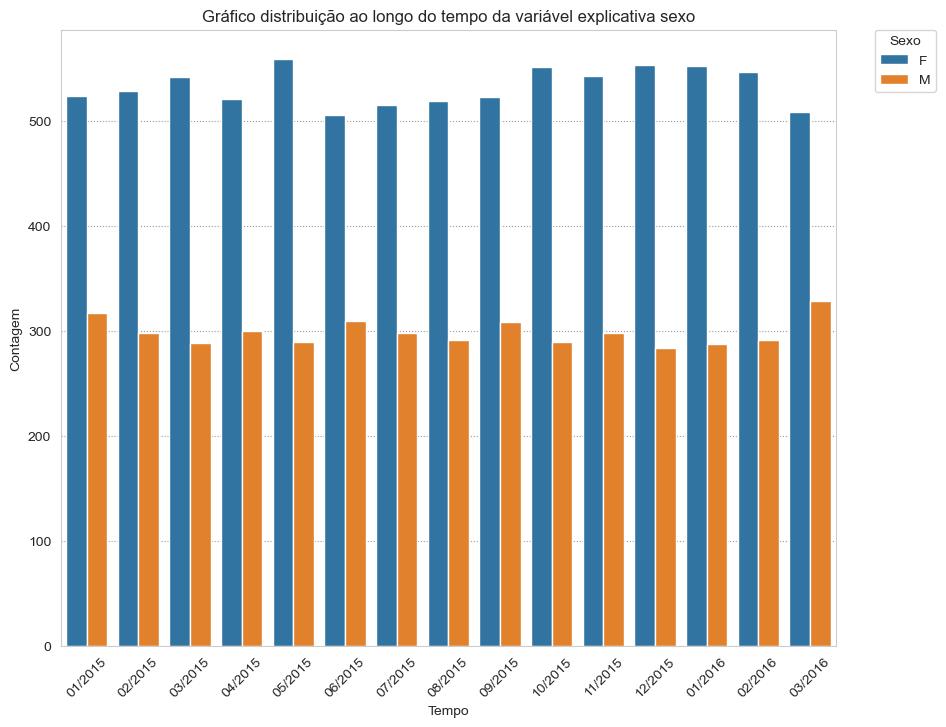

In [23]:
bar('sexo')

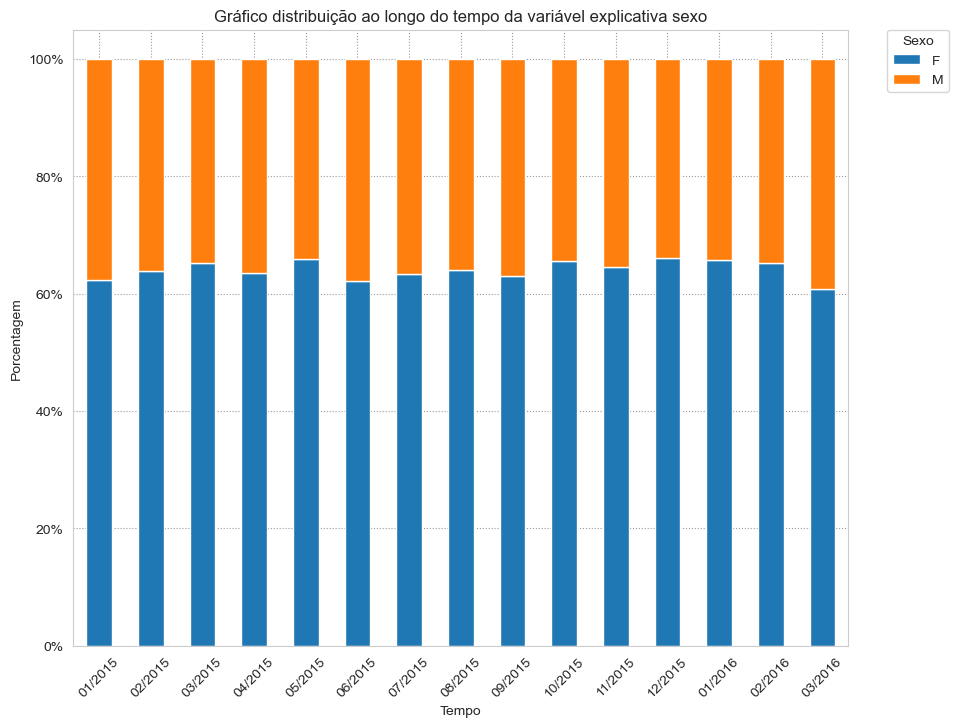

In [25]:
stacked('sexo')

##### Gráfico Posse de Veículo:

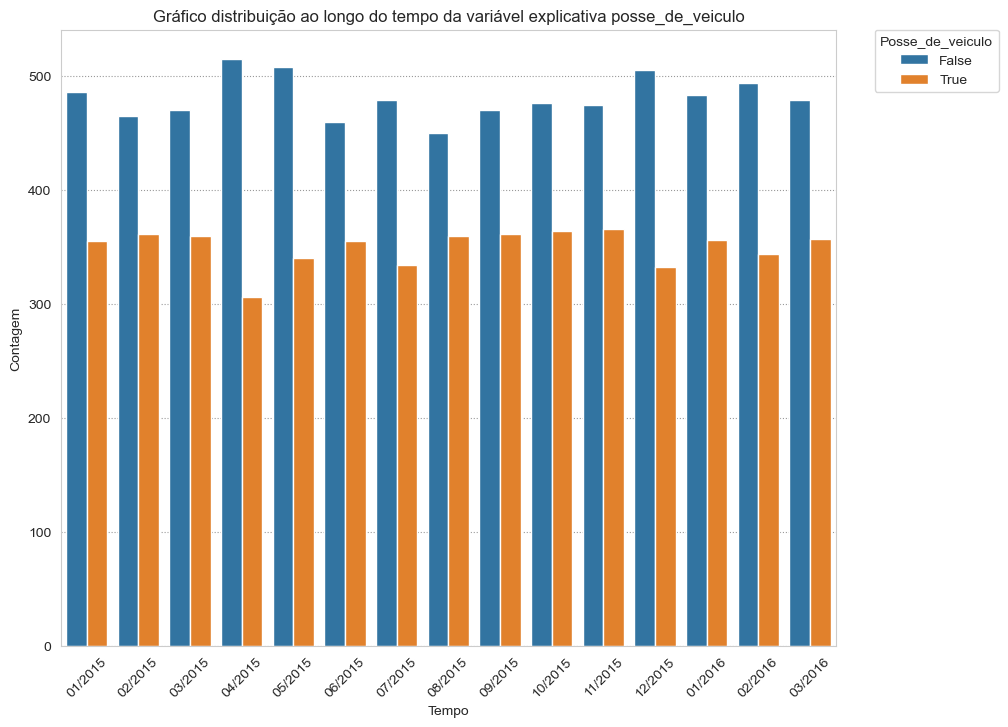

In [27]:
bar('posse_de_veiculo')

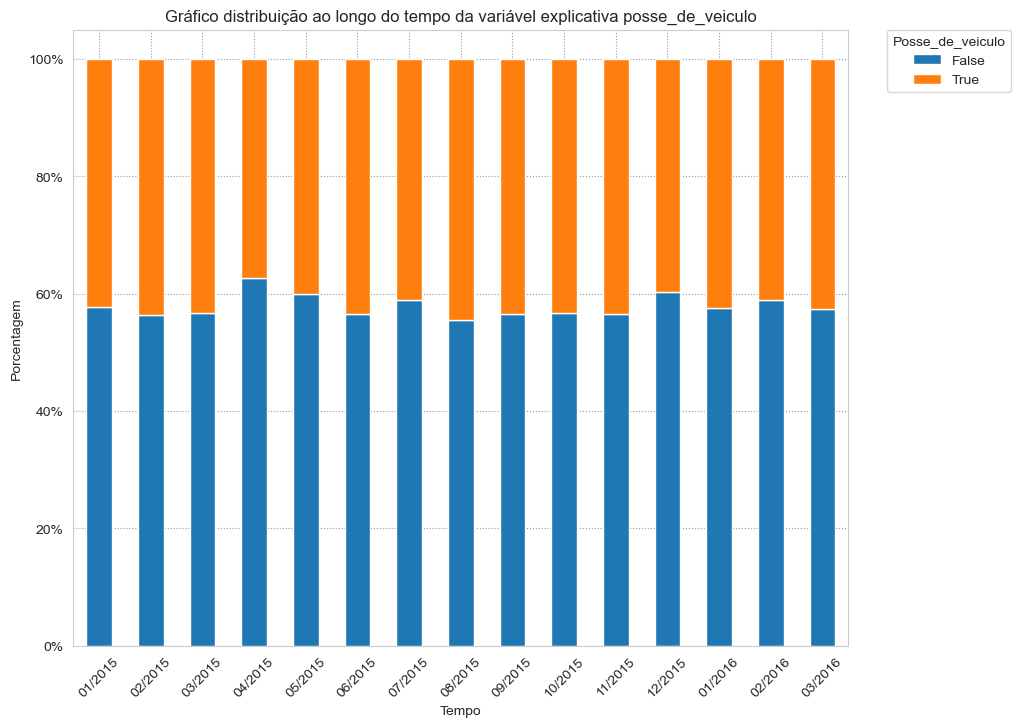

In [29]:
stacked('posse_de_veiculo')

##### Gráfico Posse de Imóvel:

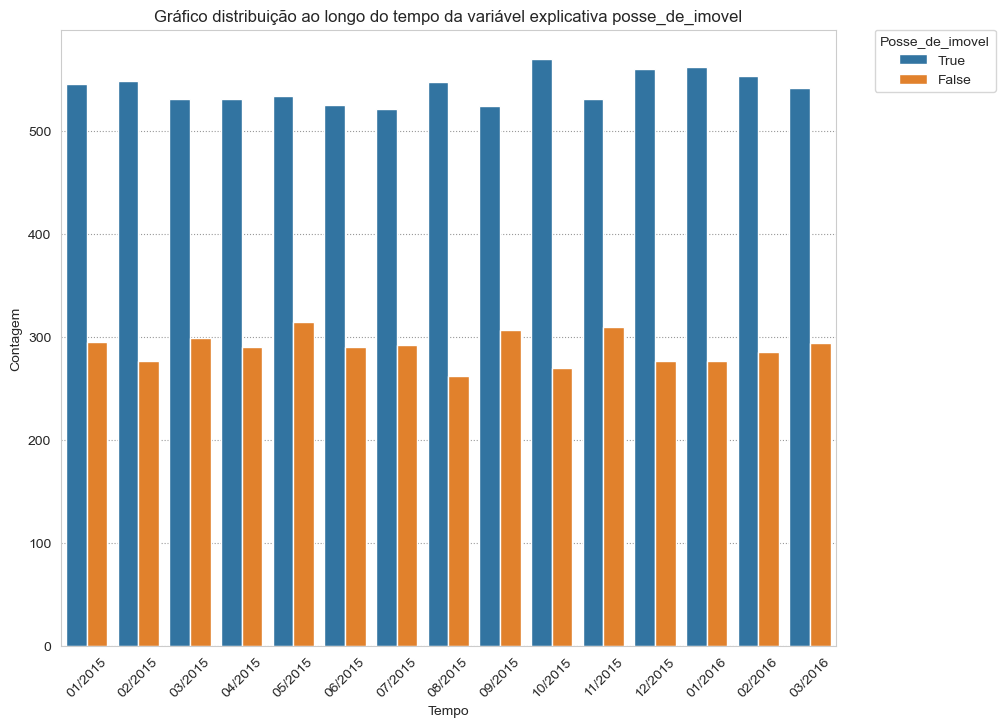

In [31]:
bar('posse_de_imovel')

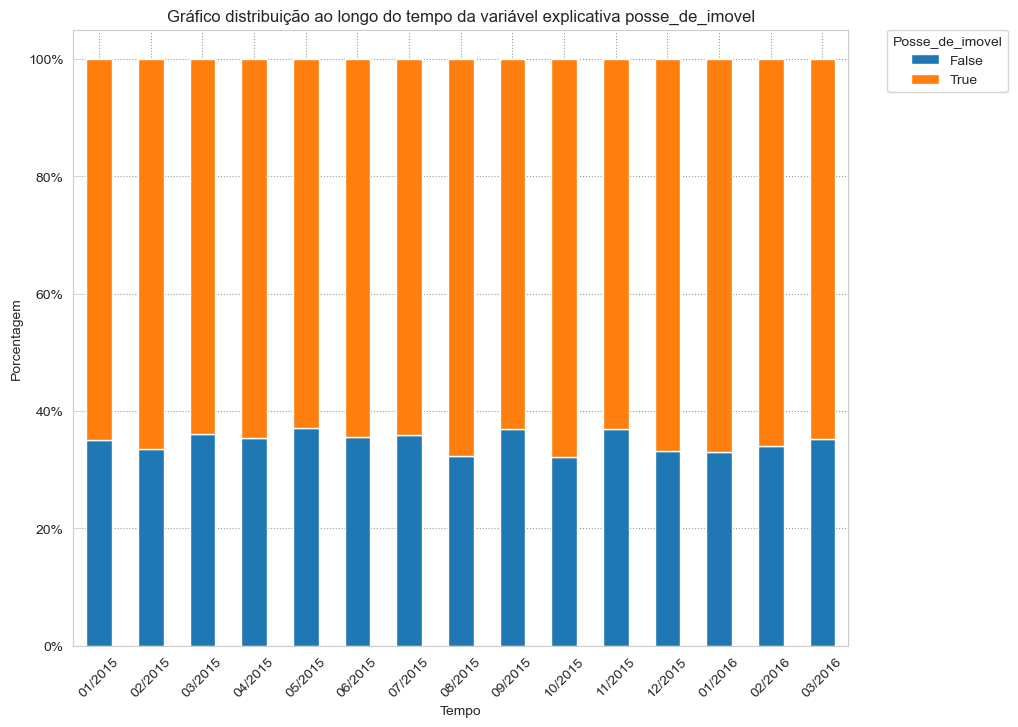

In [33]:
stacked('posse_de_imovel')

##### Gráfico Tipo de Renda:

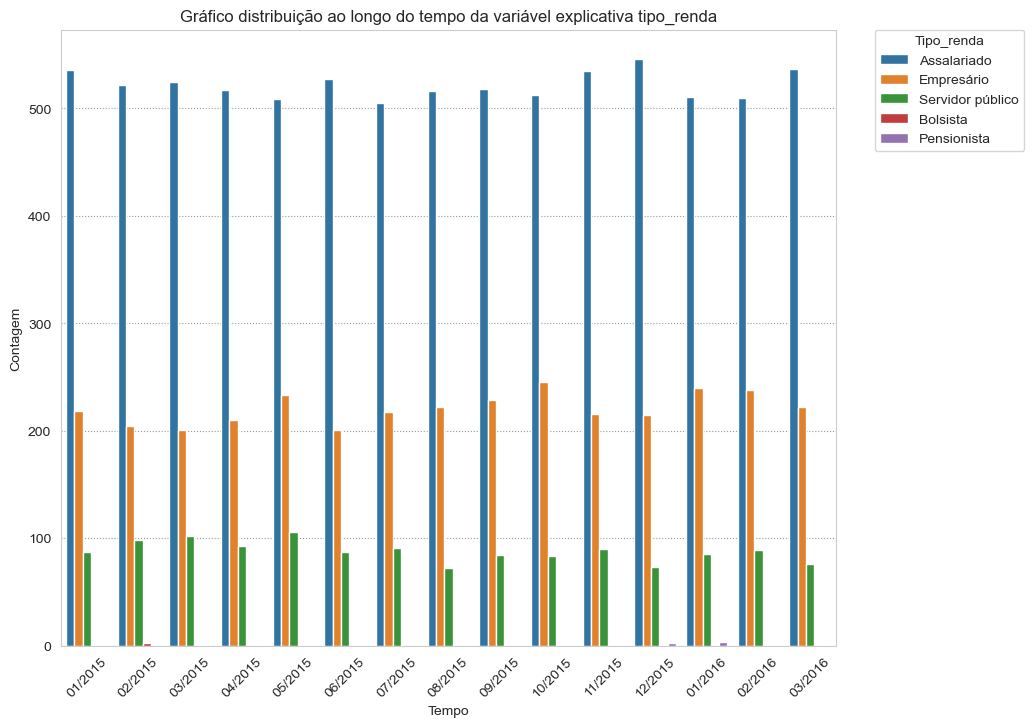

In [37]:
bar('tipo_renda')

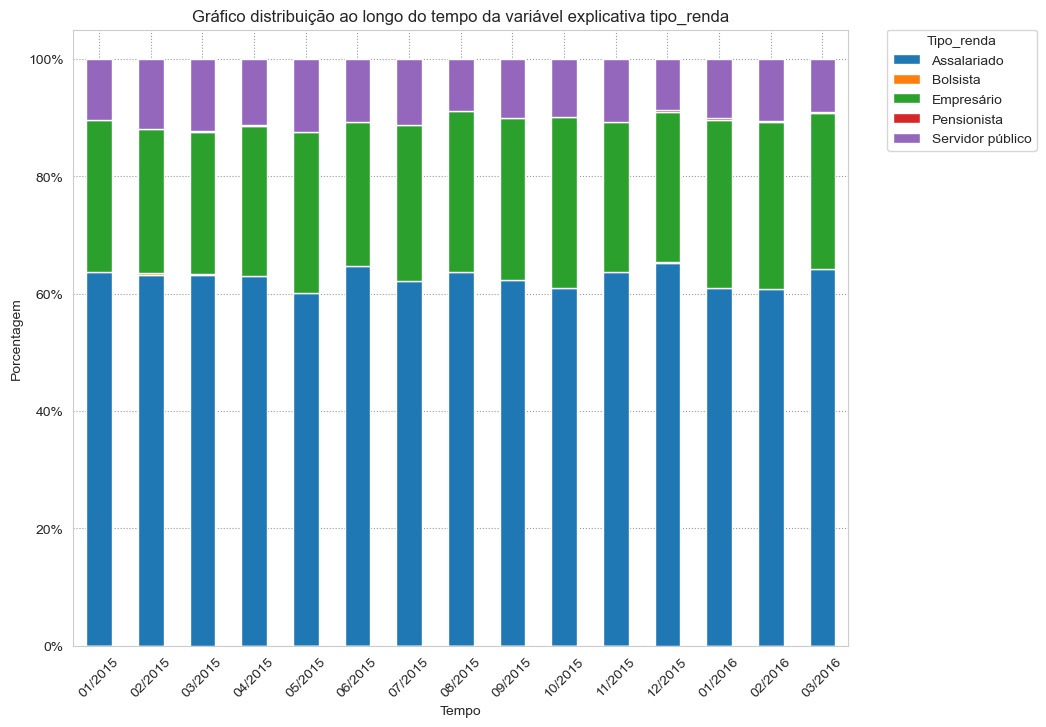

In [35]:
stacked('tipo_renda')

##### Gráfico Tipo de Educação:

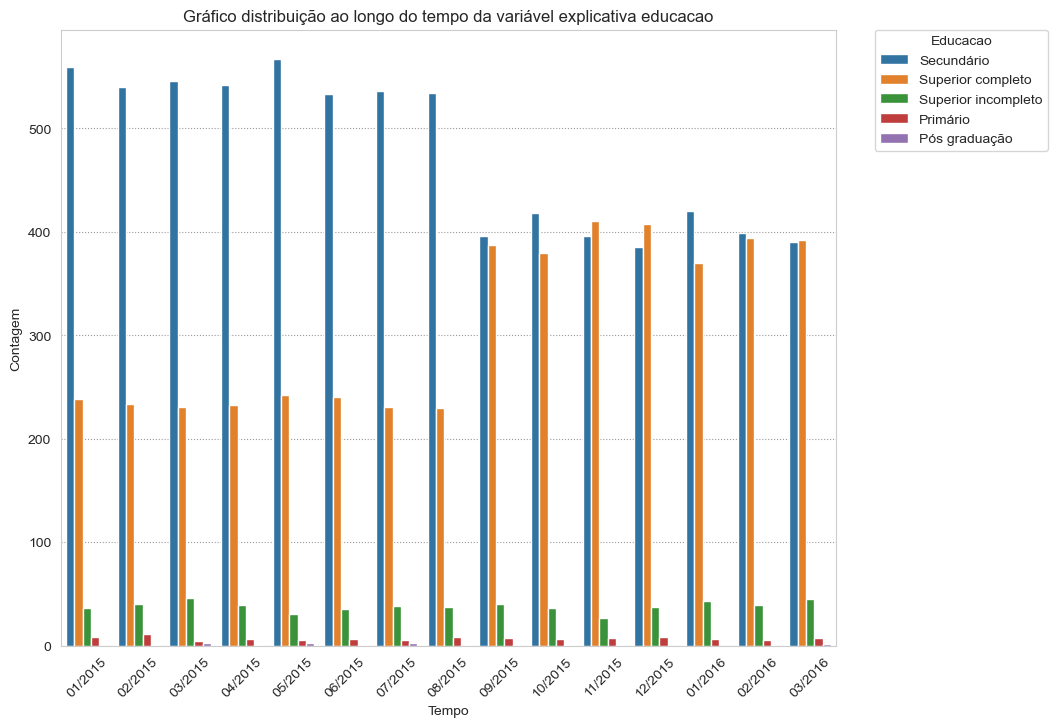

In [39]:
bar('educacao')

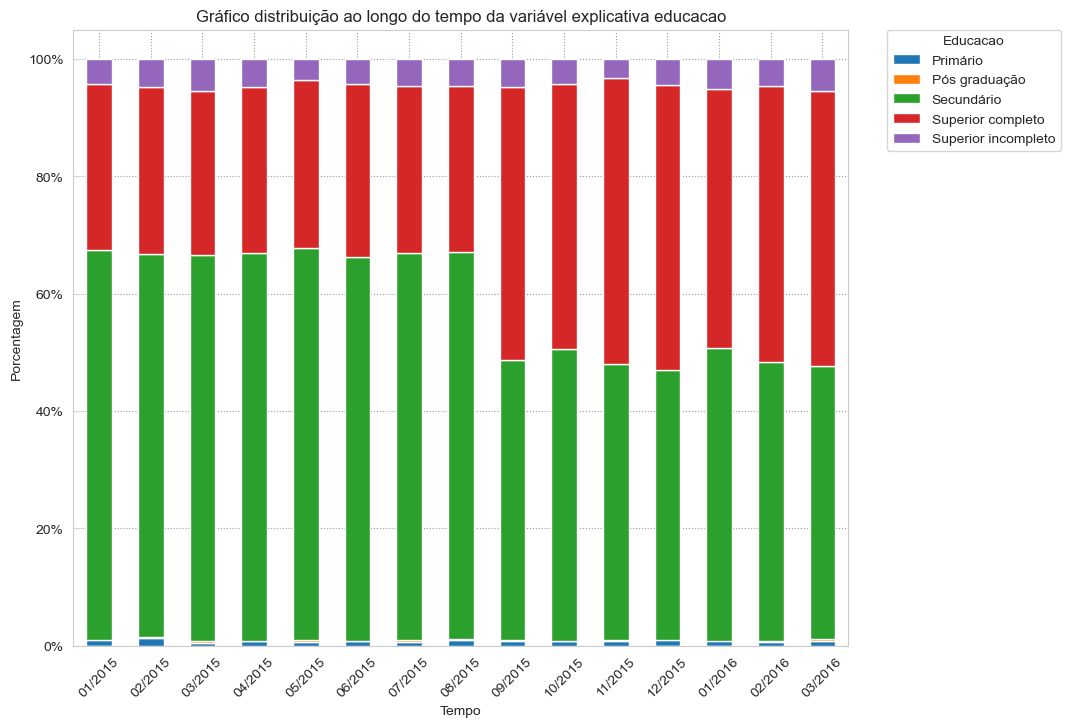

In [41]:
stacked('educacao')

##### Gráfico Estado Civil:

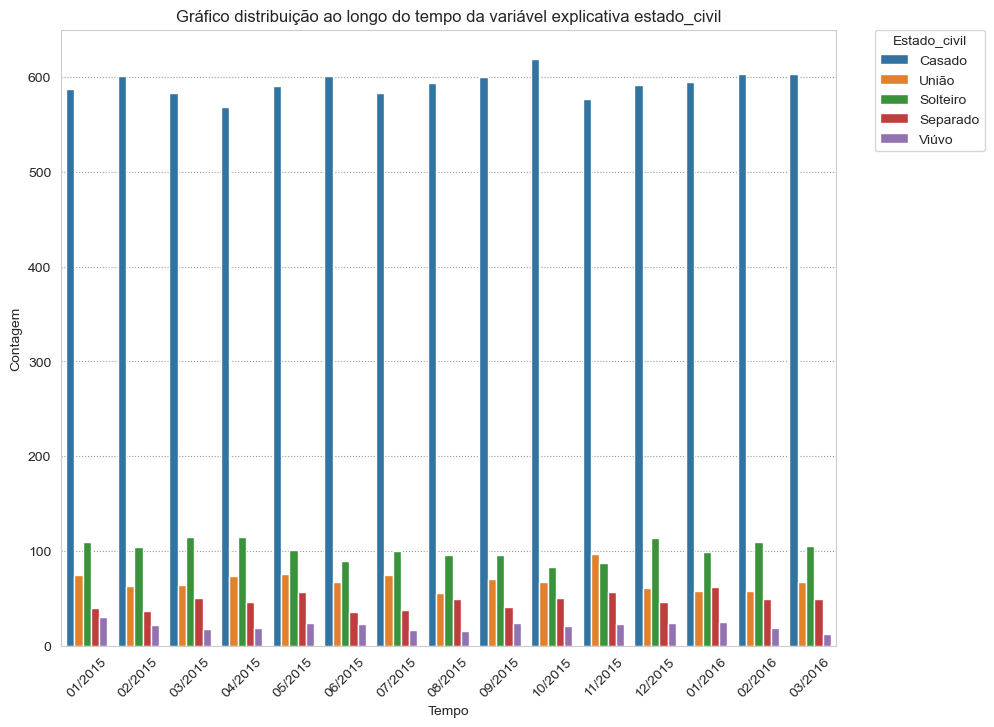

In [43]:
bar('estado_civil')

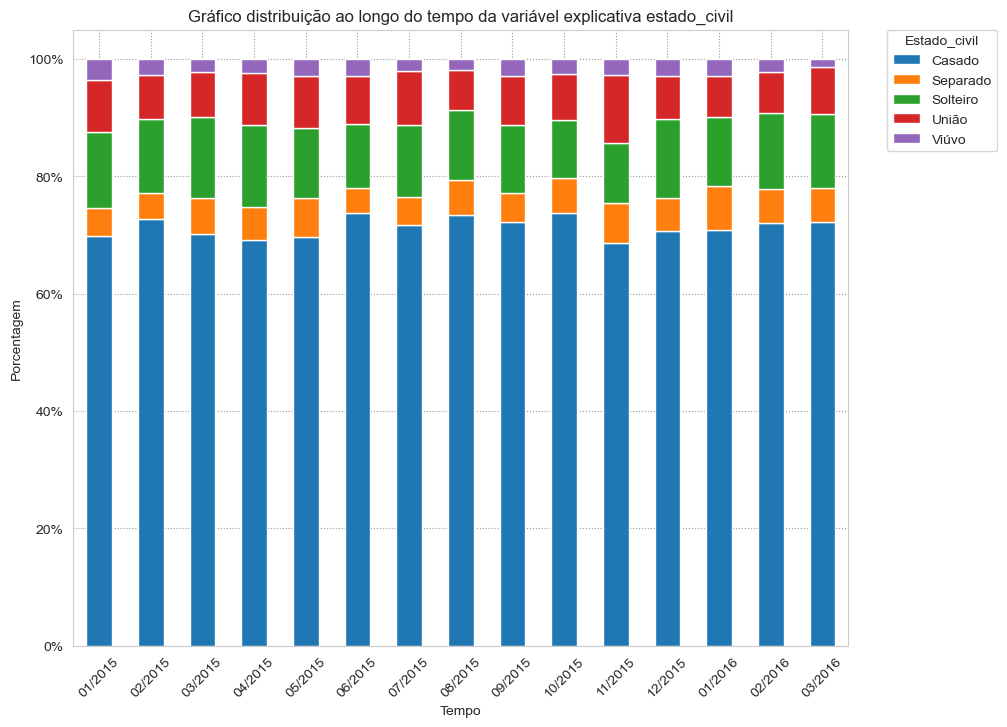

In [45]:
stacked('estado_civil')

##### Gráfico Tipo de Residência:

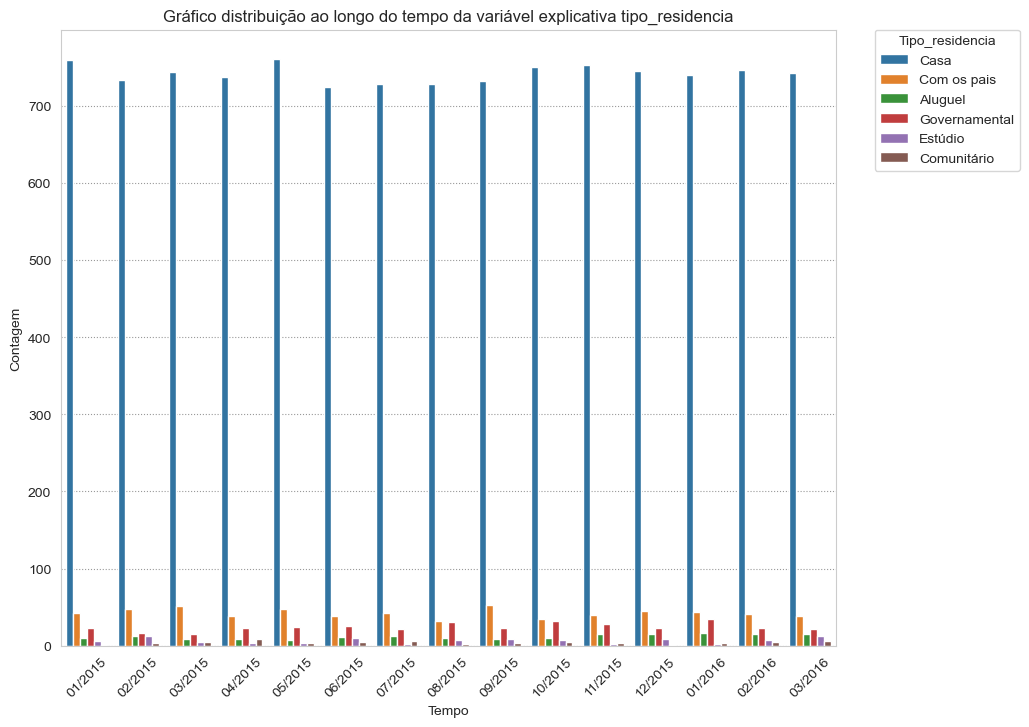

In [47]:
bar('tipo_residencia')

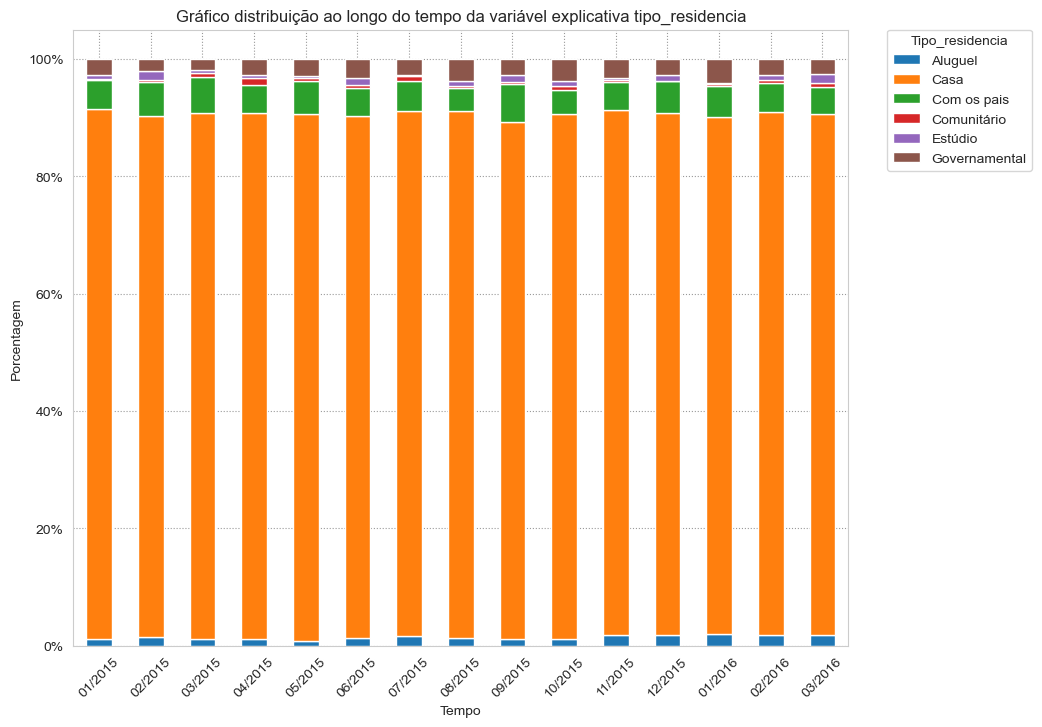

In [49]:
stacked('tipo_residencia')

##### Gráfico Mau Pagador:

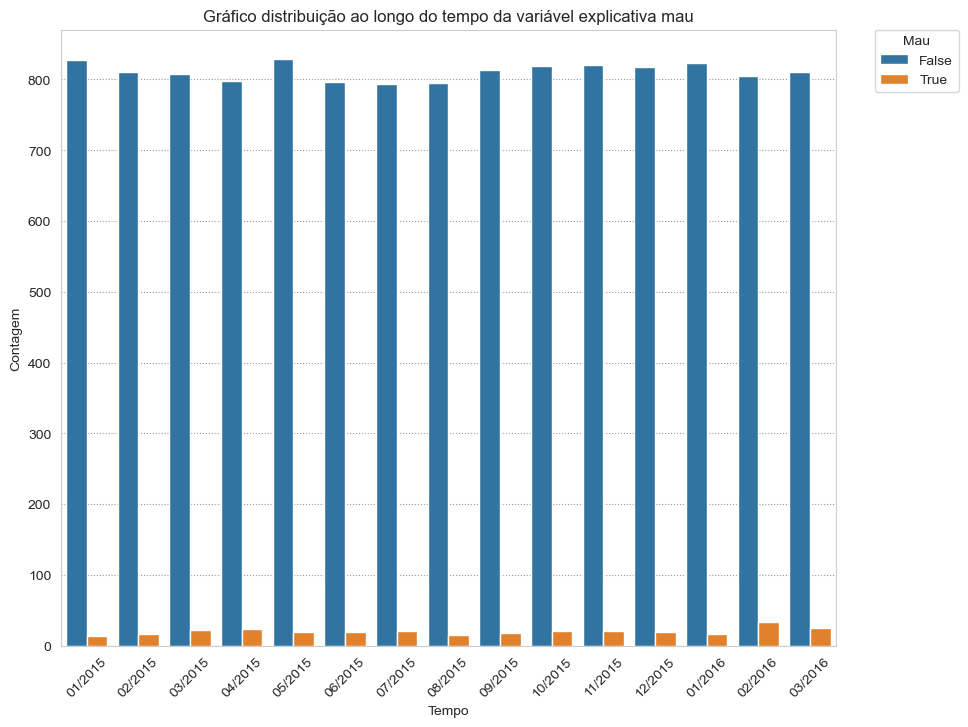

In [51]:
bar('mau')

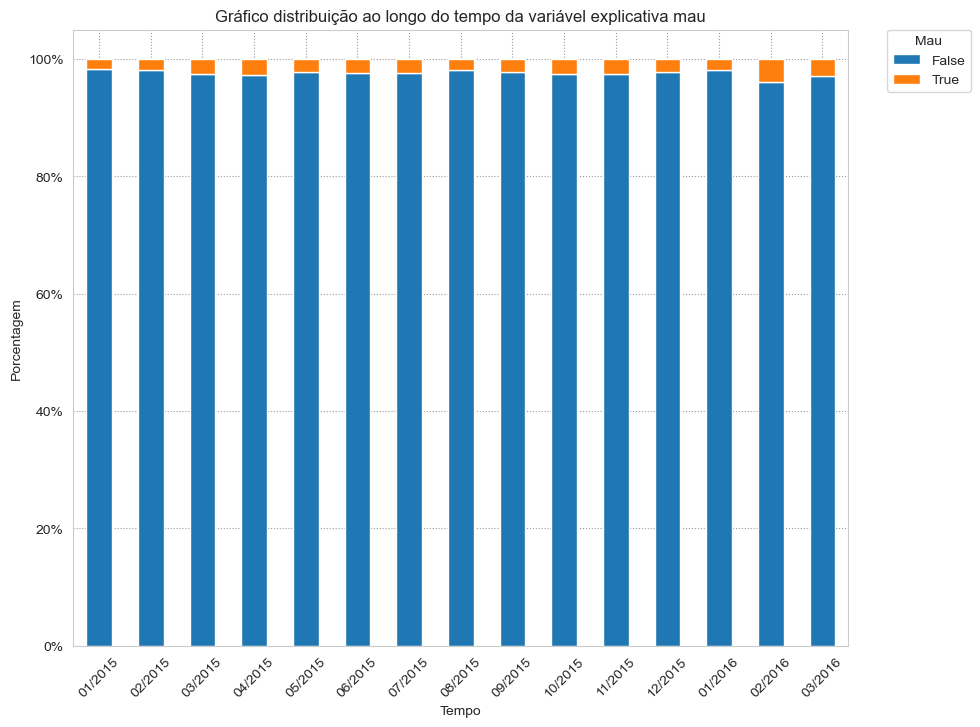

In [53]:
stacked('mau')

Após verificação de todas as variáveis explicativas, nota-se que a estabilidade se manteve em sua maioria, com a variável educacao sendo a única que sofreu uma alteração significativa durante o periodo de tempo analisado. Diminuindo a quantidade de clientes com o secundário e aumentando aqueles com superior completo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

Separando as colunas de variáveis qualitativas:

In [55]:
var_qualitativo = previsao_renda_filter.select_dtypes(exclude=['int64','float64']).columns
previsao_renda_filter[var_qualitativo].head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,tipo_renda,educacao,estado_civil,tipo_residencia,mau
0,2015-01-01,F,False,True,Assalariado,Secundário,Casado,Casa,False
1,2015-01-01,M,True,True,Empresário,Secundário,Casado,Casa,False
2,2015-01-01,M,True,True,Assalariado,Superior completo,Casado,Casa,False
3,2015-01-01,F,True,False,Empresário,Secundário,Casado,Casa,False
4,2015-01-01,M,False,False,Assalariado,Secundário,Casado,Casa,False


Criando um DataFrame com metadados das colunas selecionadas:

In [57]:
metadados_ql = pd.DataFrame({'dtypes': previsao_renda_filter[var_qualitativo].dtypes})
metadados_ql['missing'] = previsao_renda_filter[var_qualitativo].isna().sum()
metadados_ql['valores_unicos'] = previsao_renda_filter[var_qualitativo].nunique()

metadados_ql

,dtypes,missing,valores_unicos
data_ref,datetime64[ns],0,15
sexo,object,0,2
posse_de_veiculo,bool,0,2
posse_de_imovel,bool,0,2
tipo_renda,object,0,5
educacao,object,0,5
estado_civil,object,0,5
tipo_residencia,object,0,6
mau,bool,0,2


Função para avaliar a estabilidade das variáveis qualitativas ao longo do tempo:

In [59]:
def point(var: str):
    
    ''' Recebe a string de uma variável categórica e retorna
    um pointplot da renda média em função do tempo para a distribuição da variável '''
    
    fig = plt.figure(figsize=(10,8))
    
    ax = sns.pointplot(data=previsao_renda_filter,
                   x = 'data_ref',
                   y = 'renda',
                   hue = var,
                   dodge = True,
                   errorbar = ('ci', 95)
                  )

    tick_data = previsao_renda_filter['data_ref'].map(lambda data: data.strftime('%m/%Y')).unique()

    tick_data.tolist()

    ticks = ax.set_xticks(list(range(previsao_renda_filter['data_ref'].nunique())))
    labels = ax.set_xticklabels(tick_data, rotation=45)
    title = ax.set_title(f'Renda Média por Nível da Variável {var.capitalize()} ao Longo do Tempo')

    plt.xlabel('Tempo')
    plt.ylabel('Média Renda ($)')
    plt.legend(bbox_to_anchor = (1.05, 1),
               loc = 2,
               borderaxespad = 0,
               title = var.capitalize()
              )

##### Gráfico da estabilidade da variável sexo ao longo do tempo:

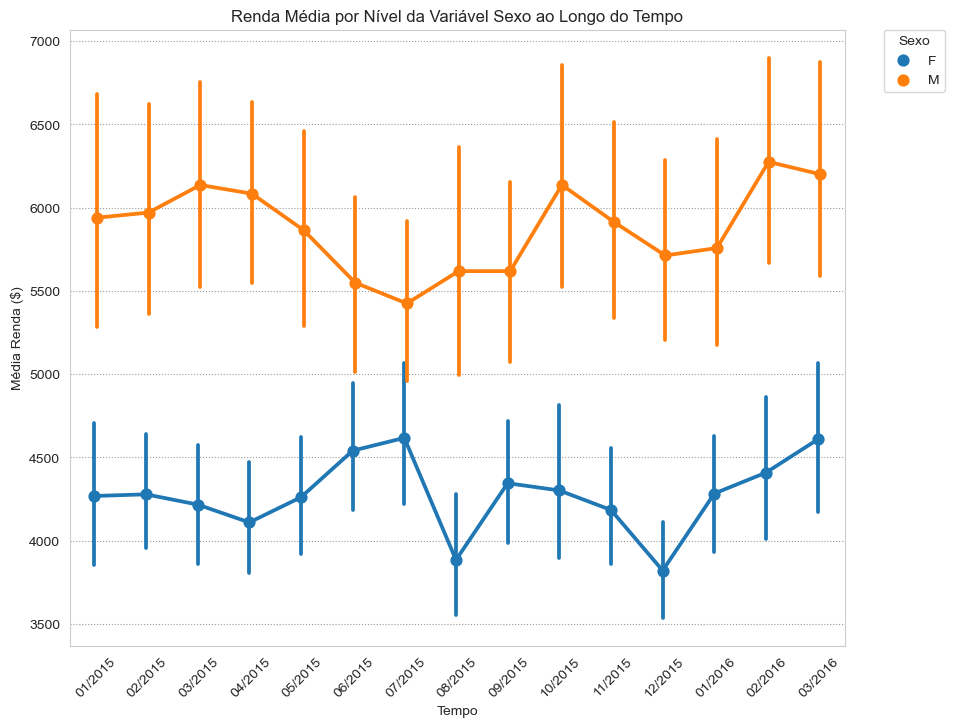

In [61]:
point('sexo')

Apesar da difença da renda média entre os sexos, a variável se manteve estável durando o período de tempo analisado.

##### Gráfico da estabilidade da variável posse_de_veiculo ao longo do tempo:

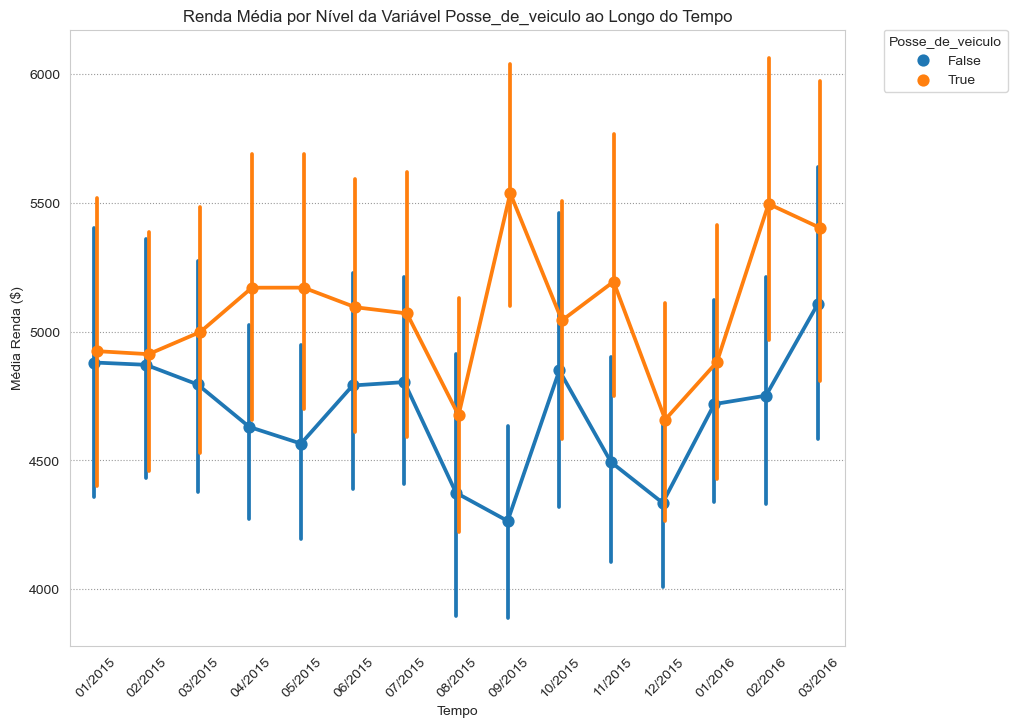

In [63]:
point('posse_de_veiculo')

A variável se manteve estável durante o periodo de tempo analisado, mesmo tendo pontos mais altos e outros mais baixos, não mudou sua carcterística.

##### Gráfico da estabilidade da variável posse_de_imovel ao longo do tempo:

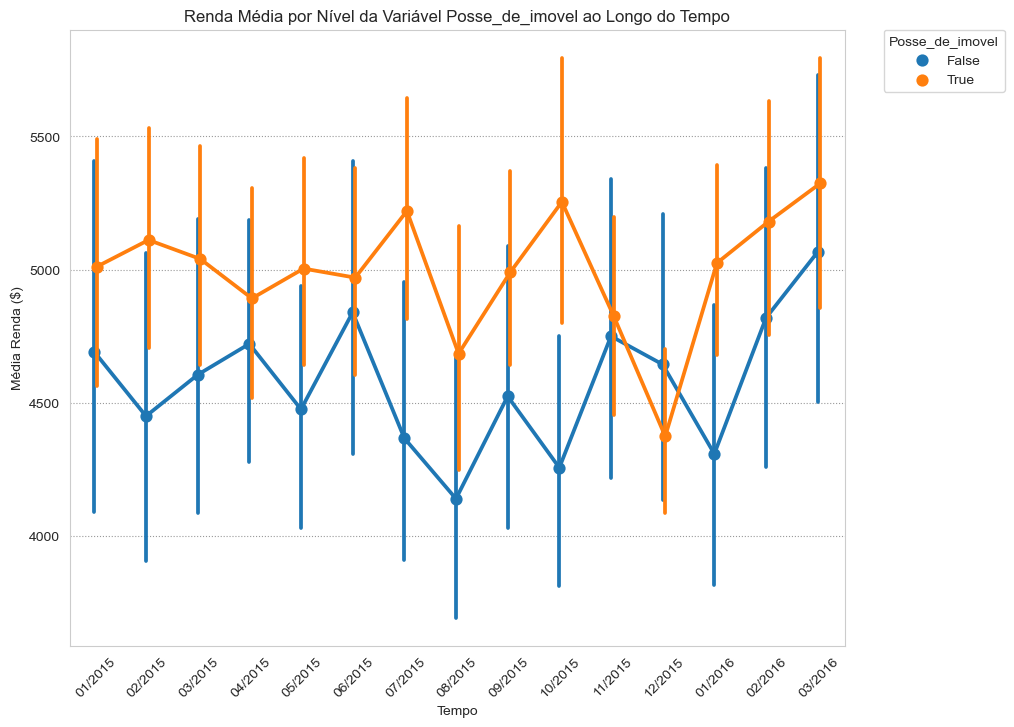

In [65]:
point('posse_de_imovel')

A variável sofreu uma mudança em sua característica no mes 12/2015 onde aqueles que não possuem imóvel superaram o valor médio de renda daqueles que possuem.

##### Gráfico da estabilidade da variável tipo_renda ao longo do tempo:

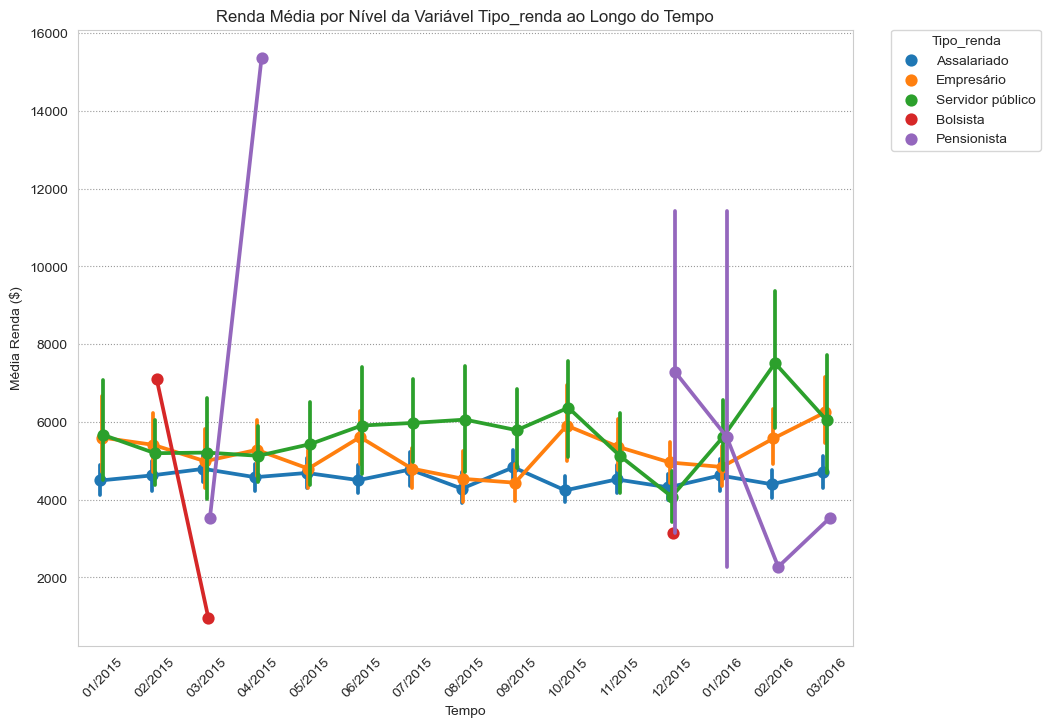

In [67]:
point('tipo_renda')

A variável se manteve estável ao longo do tempo analisado para assalariados, empresários e servidores públicos, mostrando uma instabilidade para os pensionistas e bolsistas.

##### Gráfico da estabilidade da variável mau ao longo do tempo:

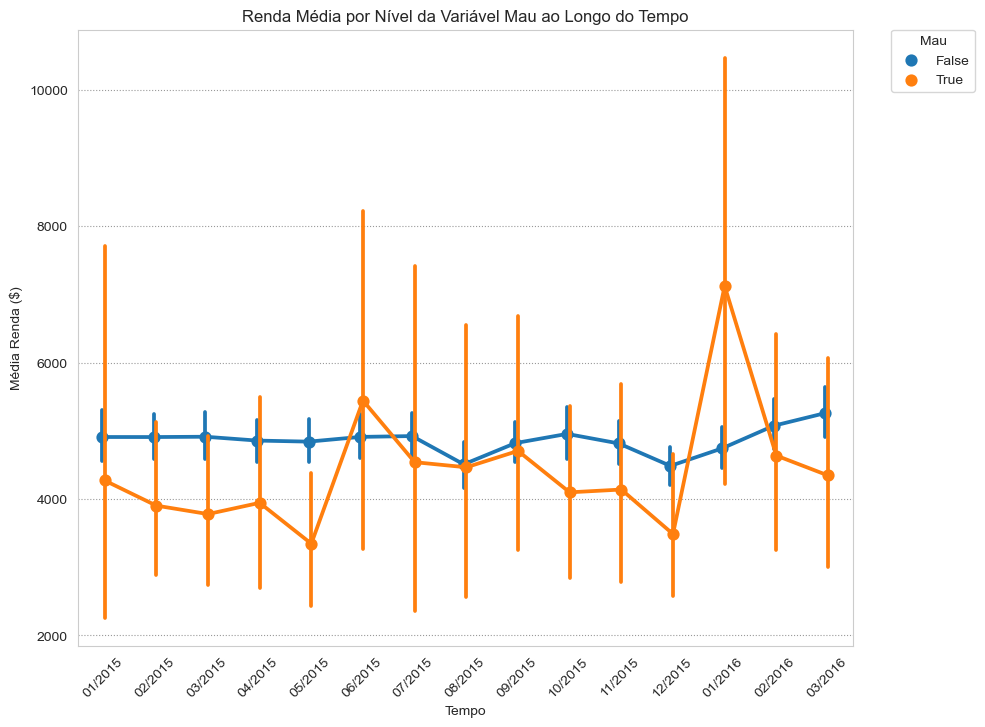

In [69]:
point('mau')

A variável se mostrou instável ao longo do tempo, aqueles que são mau pagadores superaram o valor de renda média daqueles que são bons pagadores nas datas de 06/2015 e 01/2016.

Dentre todas as variáveis explicativas analisadas, aquelas que se mostraram estáveis, durante o período de tempo em questão, podem ser utilizadas em uma modelagem.